In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2023 - 4 - 26)

# ___Sampling Simulation___
---------------

TypeError: isinstance() arg 2 must be a type, a tuple of types, or a union

In [150]:
def draw_sample(nattempts: int, sample_size: int, gym_frac: float, gymgoers_only: bool) -> None:
    
    population_size = 100_000
    mean_uofm = 135
    stddev_uofm = 5.124
    mean_gym = 195 
    stddev_gym = 4.675 

    fig, (axes_all, axes_sampledist)  = plt.subplots(ncols = 2)
    fig.set_size_inches(20, 5)
    
    regulars = np.random.normal(loc = mean_uofm, scale = stddev_uofm, size = int(population_size * (1 - gym_frac)))
    gym_goers = np.random.normal(loc = mean_gym, scale = stddev_gym, size = int(population_size * gym_frac))
    all_students = np.append(regulars, gym_goers)
    
    if gymgoers_only:
        population = gym_goers
        
    else:
        population = np.append(regulars, gym_goers)

    sample_means = []
    assert len(population) >= sample_size, "Cannot specify a sample size, larger than the population"
    
    for i in range(nattempts):
        sample = np.random.choice(population, size = sample_size, replace = True)
        sample_means.append(sample.mean())
        

    pcnt = "Gym goers (%.2f) %%" % (gym_frac * 100)    
    axes_all.hist(population, bins = 100, color = "blue", rwidth = 0.9, alpha = 0.5, label = pcnt)
    axes_all.legend()
    
    axes_sampledist.hist(sample_means, bins = 100, color = "green", rwidth = 0.9, alpha = 0.5)
    axes_sampledist.vlines(x = np.mean(sample_means), ymin = 0, ymax = axes_sampledist.get_ylim()[1],
                          color = "red", label = "Mean of sample means")
    axes_sampledist.vlines(x = all_students.mean(), ymin = 0, ymax = axes_sampledist.get_ylim()[1],
                          color = "blue", label = "Mean of population")
    axes_sampledist.legend()
    axes_sampledist.set_title("Sampling distribution", pad = .5)
    
    plt.show()

In [151]:
# keep the sample size constant, and change the number of sampling attempts

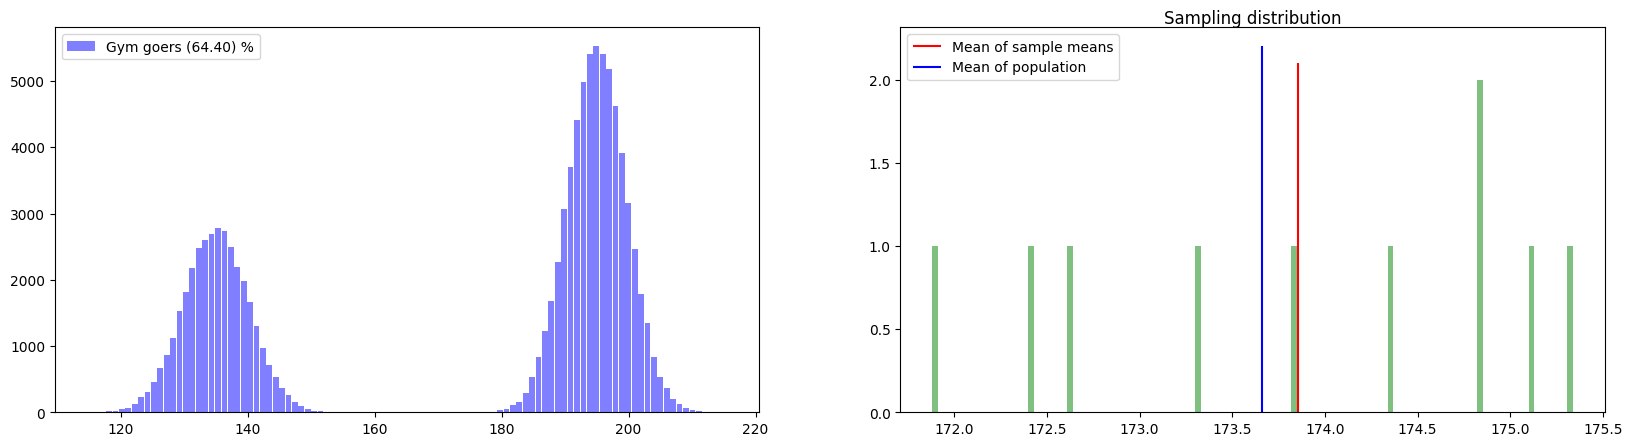

In [152]:
draw_sample(nattempts = 10, sample_size = 1000, gym_frac = 0.644, gymgoers_only = False)

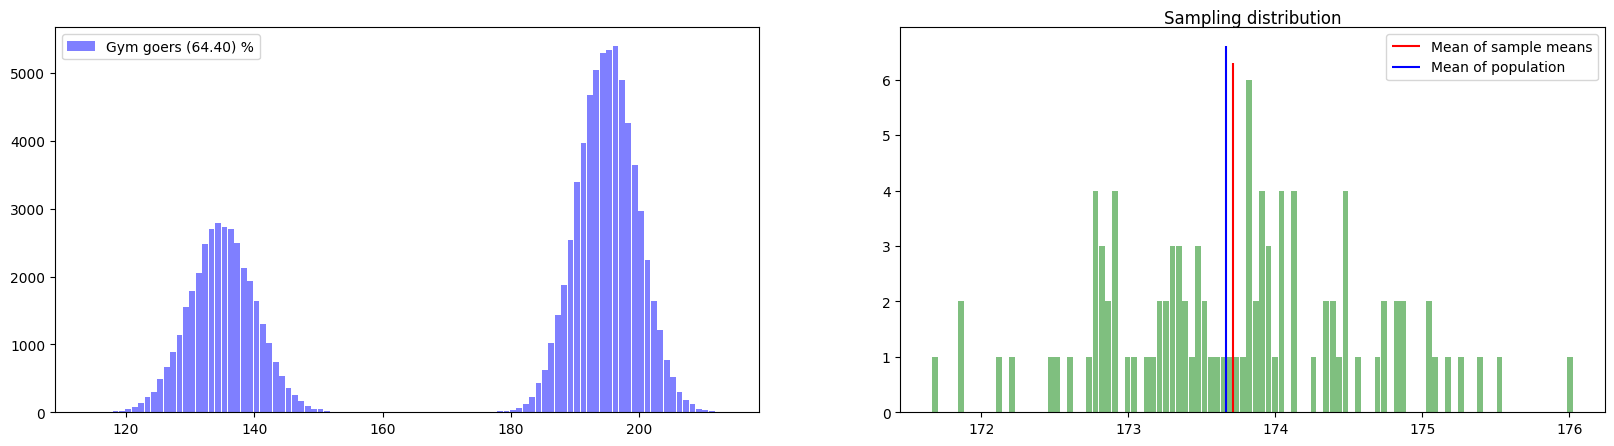

In [153]:
draw_sample(nattempts = 100, sample_size = 1000, gym_frac = 0.644, gymgoers_only = False)

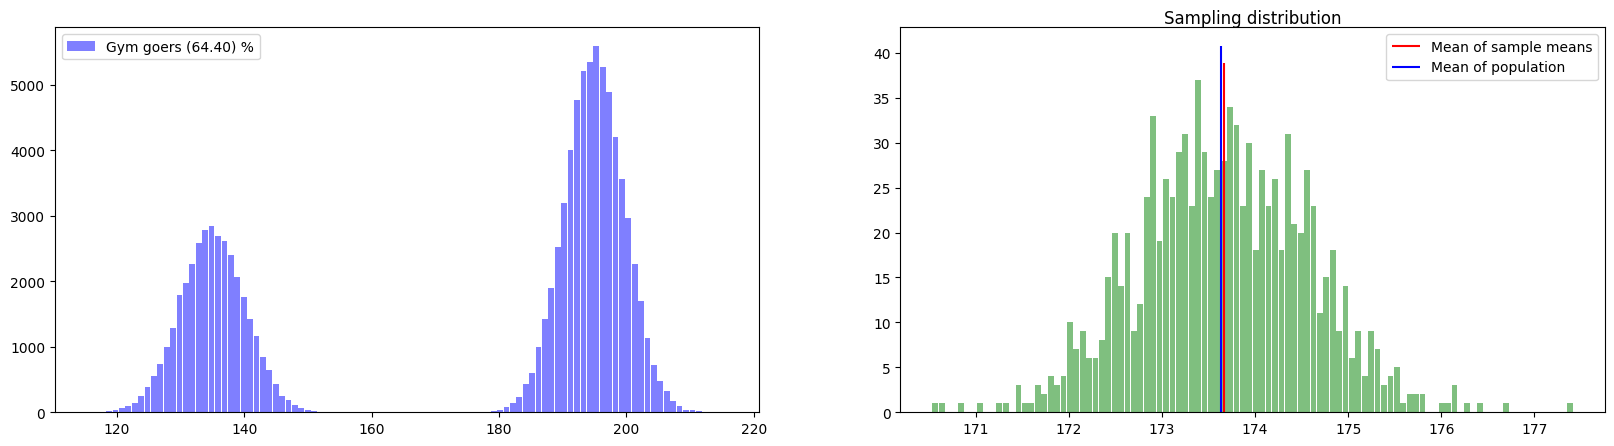

In [154]:
draw_sample(nattempts = 1000, sample_size = 1000, gym_frac = 0.644 , gymgoers_only = False)

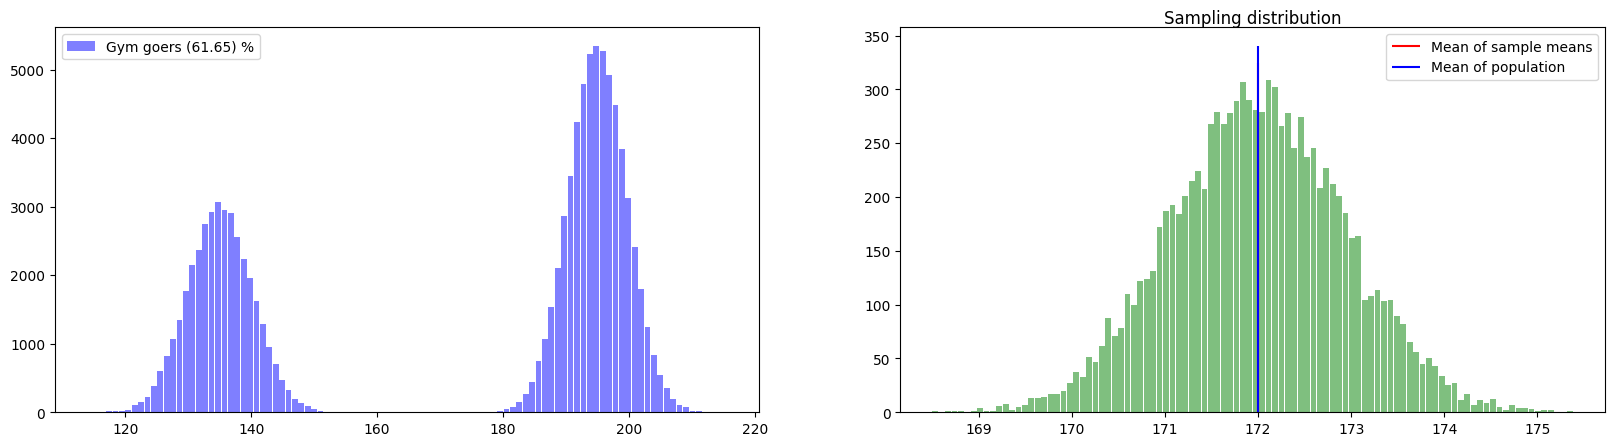

In [155]:
draw_sample(nattempts = 10000, sample_size = 1000, gym_frac = 0.616454, gymgoers_only = False)

In [156]:
# Keep the number of sampling attempts constant, change the sample size

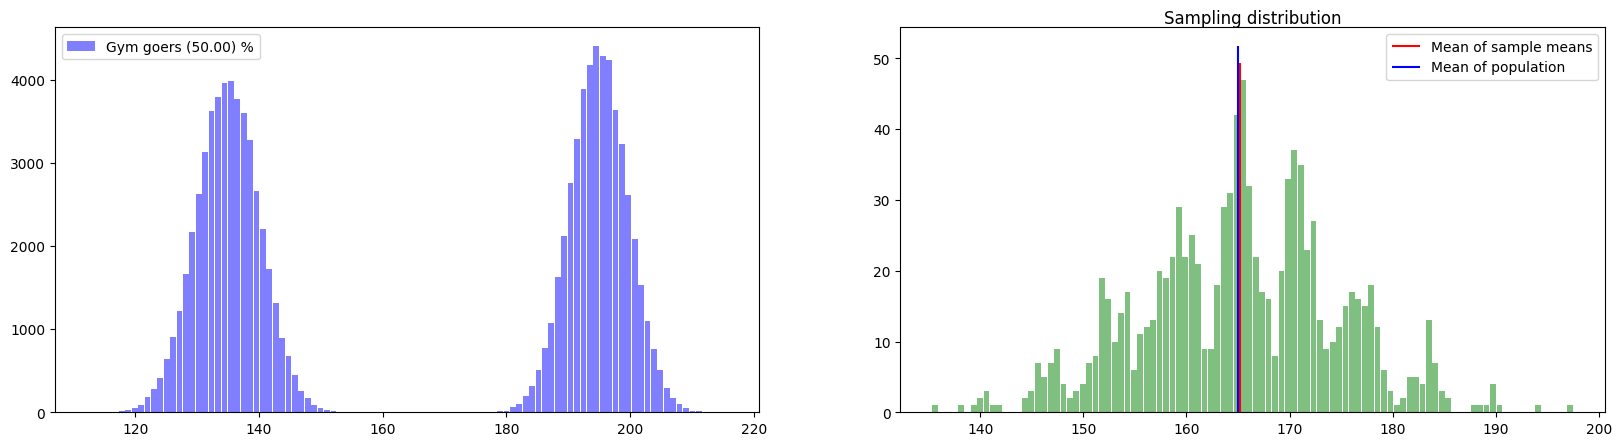

In [158]:
draw_sample(nattempts = 1000, sample_size = 10, gym_frac = 0.5, gymgoers_only = False)

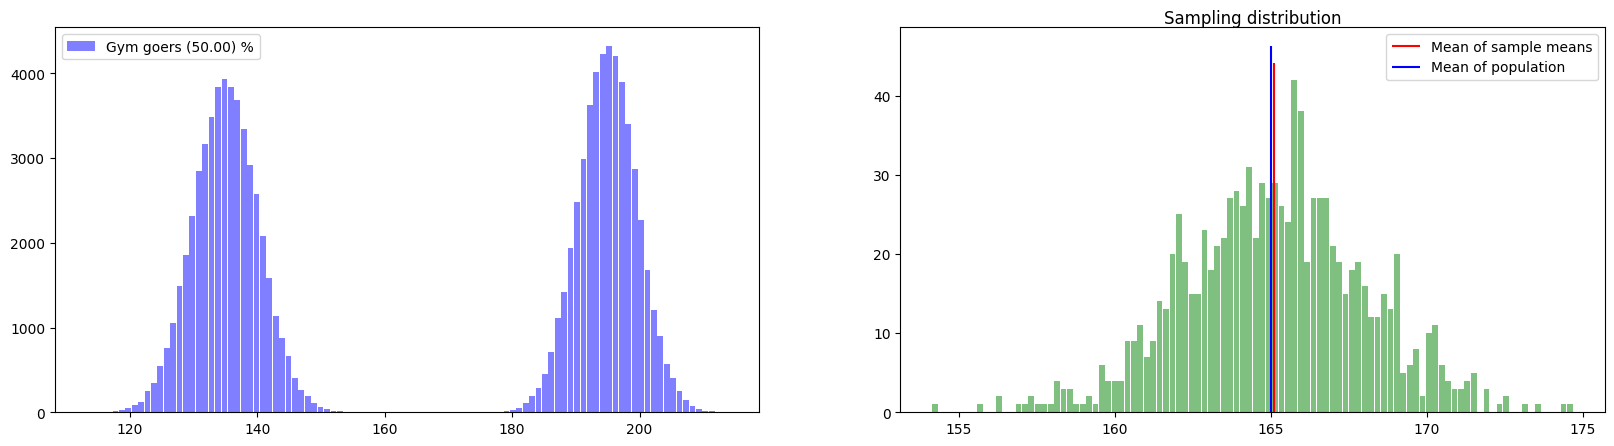

In [159]:
draw_sample(nattempts = 1000, sample_size = 100, gym_frac = 0.5 , gymgoers_only = False)

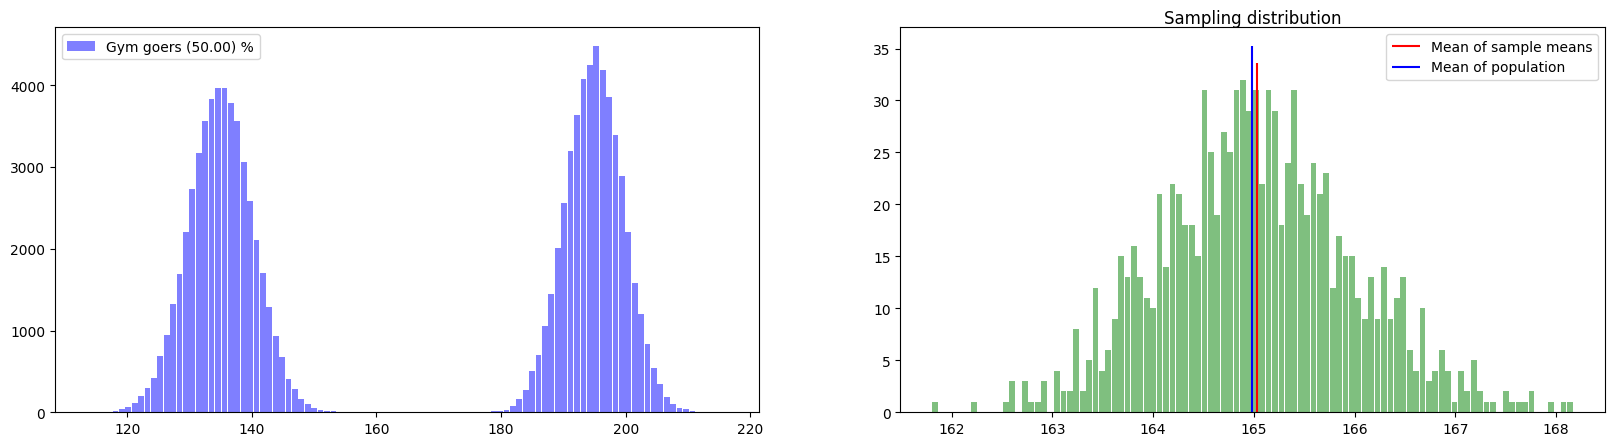

In [160]:
draw_sample(nattempts = 1000, sample_size = 1000, gym_frac = 0.5 , gymgoers_only = False)

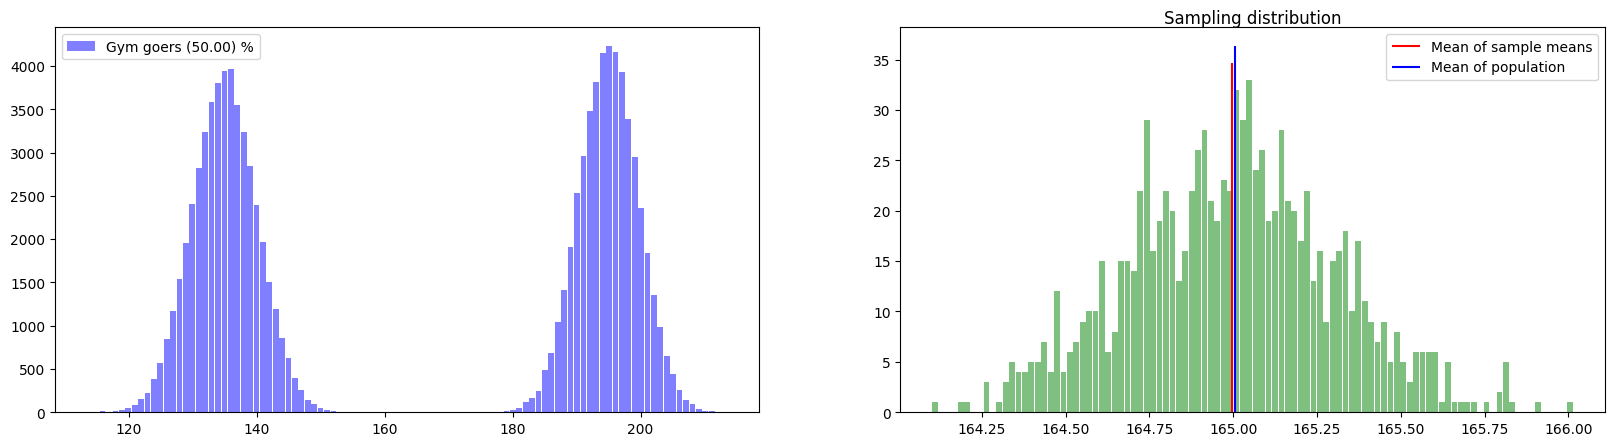

In [161]:
draw_sample(nattempts = 1000, sample_size = 10000, gym_frac = 0.5, gymgoers_only = False)

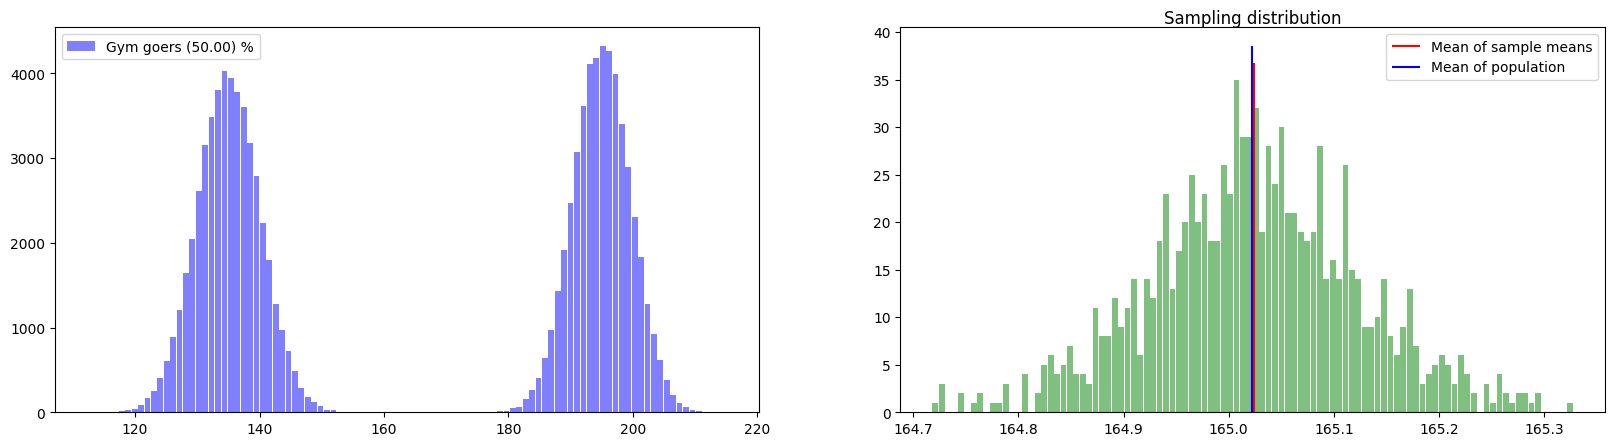

In [162]:
draw_sample(nattempts = 1000, sample_size = 100000, gym_frac = 0.5, gymgoers_only = False)

In [163]:
# Sampling just the gym goers

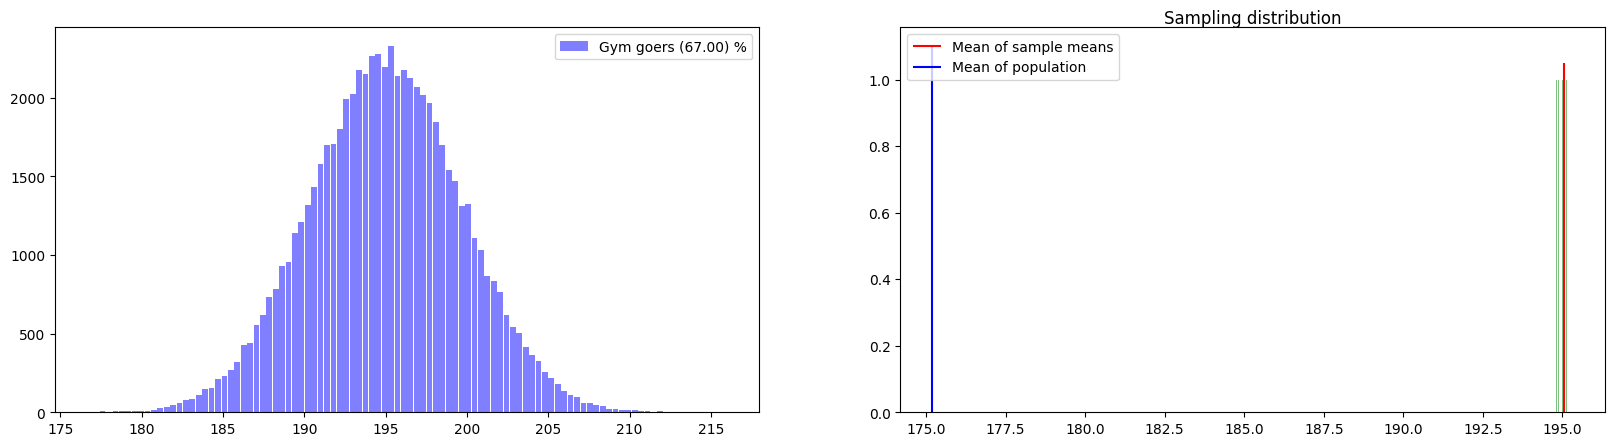

In [164]:
draw_sample(nattempts = 10, sample_size = 1000, gym_frac = 0.67, gymgoers_only = True)

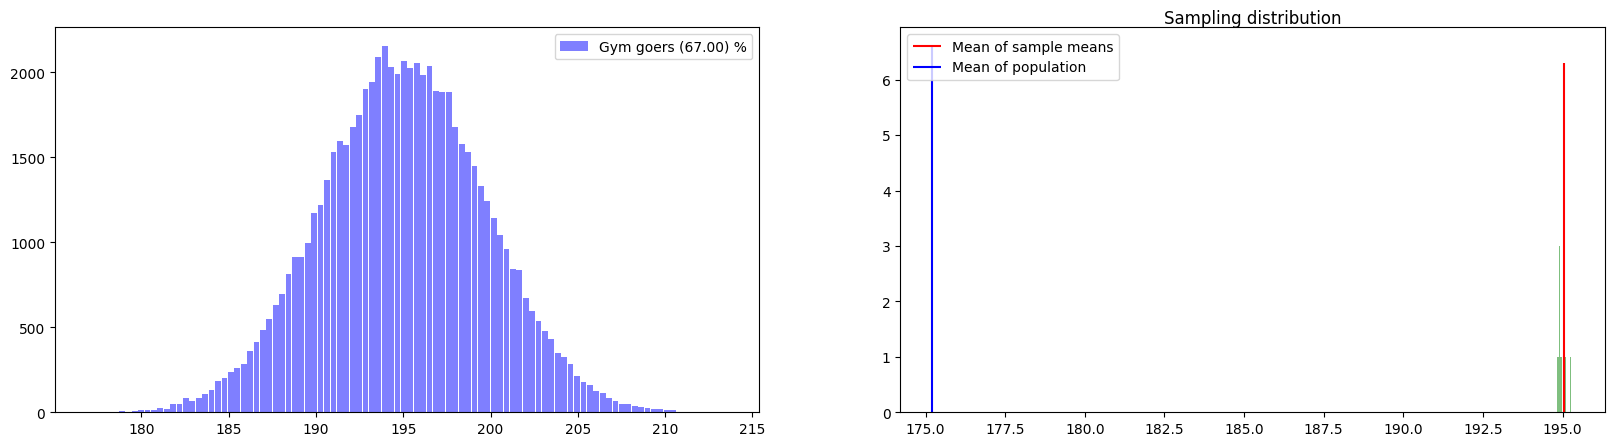

In [165]:
draw_sample(nattempts = 100, sample_size = 1000, gym_frac = 0.67, gymgoers_only = True)

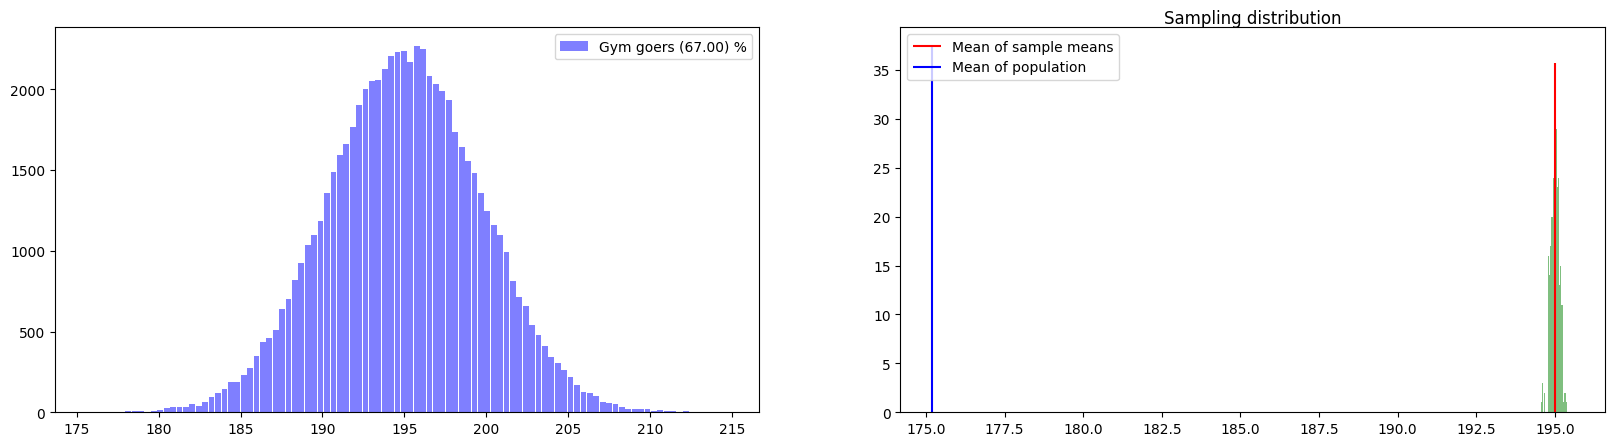

In [166]:
draw_sample(nattempts = 1000, sample_size = 1000, gym_frac = 0.67, gymgoers_only = True)

In [ ]:
# See how sampling just the gym goers gives a very misrepresentative idea of the population.